<a href="https://colab.research.google.com/github/jaiswalshubhi12/Women-Clothing-Ecommerce-EDA/blob/main/Copy_of_Women_Clothing_Ecommerce_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/women_clothing_ecommerce_sales.csv')
df

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264
...,...,...,...,...,...,...,...,...
522,171,2022/9/9 6:27:00,799,Dark Blue,M,265,1,265
523,172,2022/9/9 7:18:00,708,Dark Blue,4XL,278,1,278
524,173,2022/9/9 7:22:00,799,Dark Blue,M,265,1,265
525,174,2022/9/9 8:25:00,799,Dark Blue,L,265,1,265


**About Dataset :** This dataset contains the following columns along with their descriptions:

order_id: unique identifier for each order placed

order_date: date and time of order

sku: a number used by retailer to assign their products

color: color of the product

size: size of the product, treat missing values as ( One Size )

unit_price: unit price of the product

quantity: quantity ordered for that particular product

revenue: unit_price * quantity

In [ ]:
#Data Understanding
df.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


In [ ]:
df.tail()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
522,171,2022/9/9 6:27:00,799,Dark Blue,M,265,1,265
523,172,2022/9/9 7:18:00,708,Dark Blue,4XL,278,1,278
524,173,2022/9/9 7:22:00,799,Dark Blue,M,265,1,265
525,174,2022/9/9 8:25:00,799,Dark Blue,L,265,1,265
526,175,2022/9/9 9:47:00,799,Dark Blue,XL,265,1,265


In [ ]:
df.size

4743

In [ ]:
df.describe()

,order_id,unit_price,quantity,revenue
count,527.000000,527.000000,527.000000,527.000000
mean,115.313093,274.973435,1.011385,278.024668
std,73.106716,34.517412,0.106193,44.741095
min,1.000000,191.000000,1.000000,191.000000
25%,54.000000,266.000000,1.000000,266.000000
50%,110.000000,278.000000,1.000000,278.000000
75%,166.000000,288.000000,1.000000,288.000000
max,273.000000,899.000000,2.000000,899.000000


In [ ]:
df.ndim

2

**Cleaning the data: **

In [ ]:
df.isnull().sum()

order_id       0
order_date     0
sku            0
color          0
size          37
unit_price     0
quantity       0
revenue        0
dtype: int64

***Size has 37 null values. ***

In [ ]:
#fill null values,by calculating mode

df['size'].fillna(df['size'].mode()[0],inplace=True)

df

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264
...,...,...,...,...,...,...,...,...
522,171,2022/9/9 6:27:00,799,Dark Blue,M,265,1,265
523,172,2022/9/9 7:18:00,708,Dark Blue,4XL,278,1,278
524,173,2022/9/9 7:22:00,799,Dark Blue,M,265,1,265
525,174,2022/9/9 8:25:00,799,Dark Blue,L,265,1,265


In [ ]:
df['year'] = pd.DatetimeIndex(df['order_date']).year
df['month'] = pd.DatetimeIndex(df['order_date']).month
df['day'] = pd.DatetimeIndex(df['order_date']).day

df

,order_id,order_date,sku,color,size,unit_price,quantity,revenue,year,month,day
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298,2022,6,1
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258,2022,6,1
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228,2022,6,10
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264,2022,6,10
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264,2022,6,11
...,...,...,...,...,...,...,...,...,...,...,...
522,171,2022/9/9 6:27:00,799,Dark Blue,M,265,1,265,2022,9,9
523,172,2022/9/9 7:18:00,708,Dark Blue,4XL,278,1,278,2022,9,9
524,173,2022/9/9 7:22:00,799,Dark Blue,M,265,1,265,2022,9,9
525,174,2022/9/9 8:25:00,799,Dark Blue,L,265,1,265,2022,9,9


In [ ]:
df.isnull().sum()

order_id      0
order_date    0
sku           0
color         0
size          0
unit_price    0
quantity      0
revenue       0
dtype: int64

**Check Outliers**

<Axes: xlabel='revenue'>

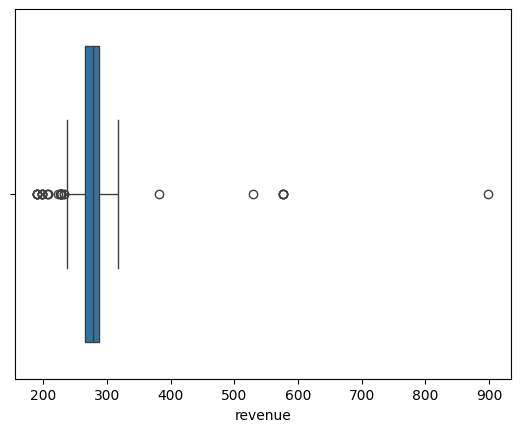

In [ ]:
sns.boxplot(x='revenue',data=df)

<Axes: ylabel='unit_price'>

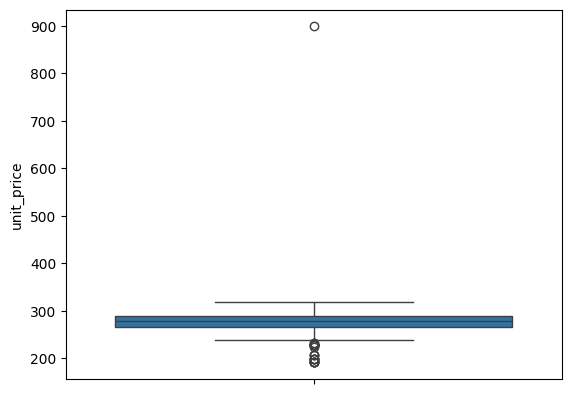

In [ ]:
sns.boxplot(df['unit_price'])

In [ ]:
df['remove_unit_price'] =np.clip(df['unit_price'], np.percentile(df['unit_price'], 5), np.percentile(df['unit_price'], 95))
df['remove_revenue'] = np.clip(df['revenue'],np.percentile(df['revenue'],5),np.percentile(df['revenue'],95))


<Axes: ylabel='remove_unit_price'>

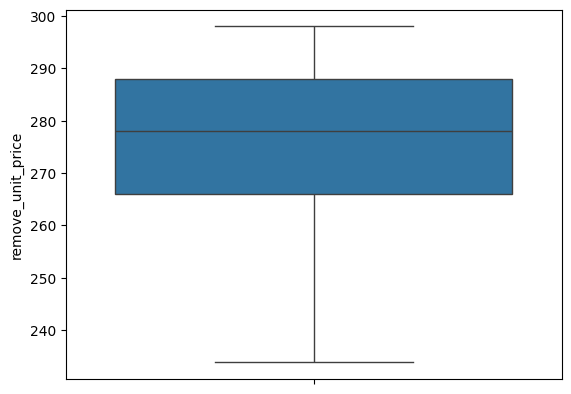

In [ ]:
sns.boxplot(df['remove_unit_price'])

<Axes: ylabel='remove_revenue'>

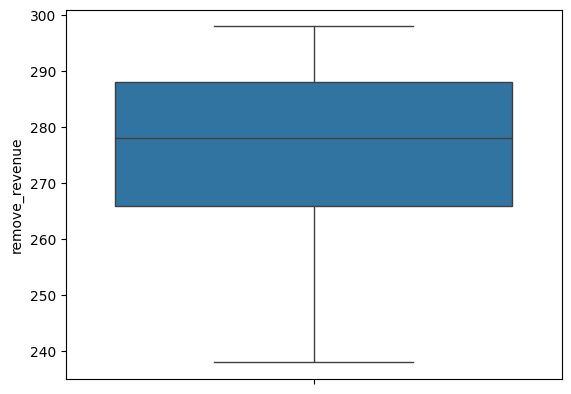

In [ ]:
sns.boxplot(df['remove_revenue'])

Univariate Analysis:

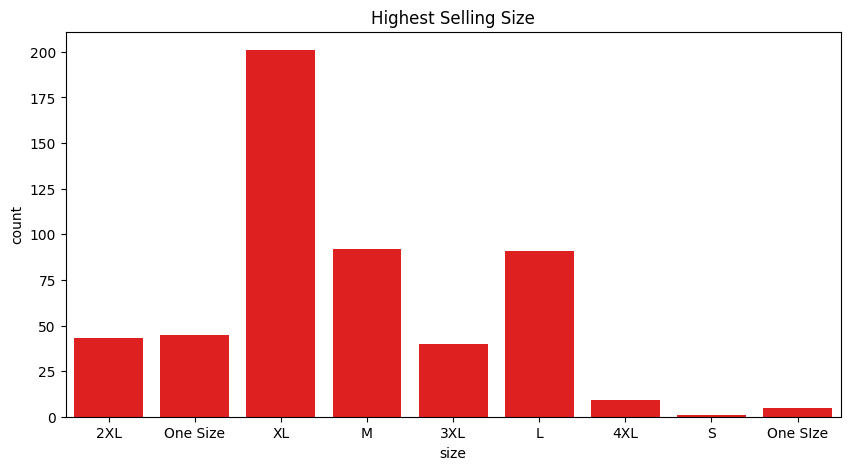

In [ ]:
#Highest Selling Size
#categorical
plt.figure(figsize=(10,5))
sns.countplot(x='size',data=df,color='Red')
plt.title('Highest Selling Size')
plt.xlabel('size')
plt.ylabel('count')
plt.show()

Insight : XL is the most sold size.

<ipython-input-48-38b3ea1b399d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='sku',y='revenue',data=df,palette="RdPu")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '708'),
  Text(1, 0, '89'),
  Text(2, 0, 'bobo'),
  Text(3, 0, '799'),
  Text(4, 0, '239'),
  Text(5, 0, '77'),
  Text(6, 0, '897'),
  Text(7, 0, '9699'),
  Text(8, 0, '127'),
  Text(9, 0, '1719'),
  Text(10, 0, '439'),
  Text(11, 0, '3799'),
  Text(12, 0, '229'),
  Text(13, 0, '2499'),
  Text(14, 0, '79'),
  Text(15, 0, '29'),
  Text(16, 0, '1499'),
  Text(17, 0, '628'),
  Text(18, 0, '61399'),
  Text(19, 0, '339'),
  Text(20, 0, '218'),
  Text(21, 0, '8499'),
  Text(22, 0, '3081'),
  Text(23, 0, '539')])

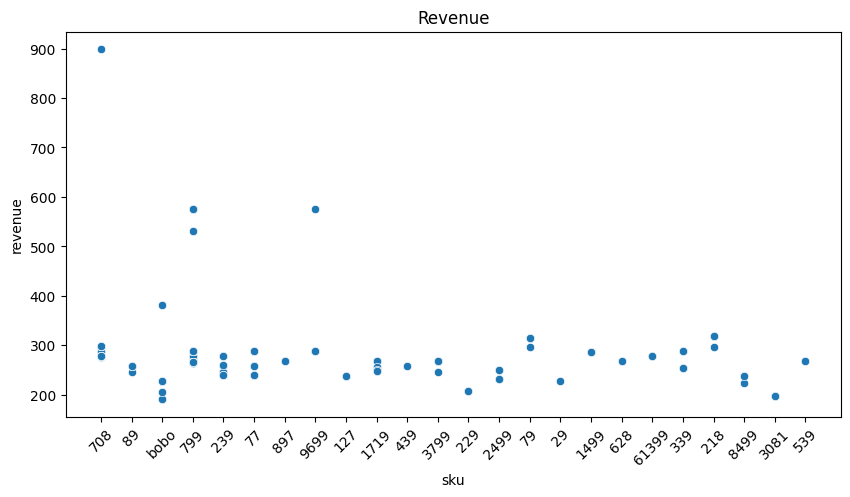

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='sku',y='revenue',data=df,palette="RdPu")
plt.title("Revenue")
plt.xticks(rotation=45)

In [ ]:
#categorical-numerical
#Top 3 color v/s quantity
df1=df.groupby('color')['quantity'].sum().sort_values(ascending=False).reset_index()[:3]
df1


,color,quantity
0,Dark Blue,401
1,Light Blue,26
2,Black,15


<ipython-input-55-738df92a48d6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='color',y='quantity',data=df1,palette='RdPu')


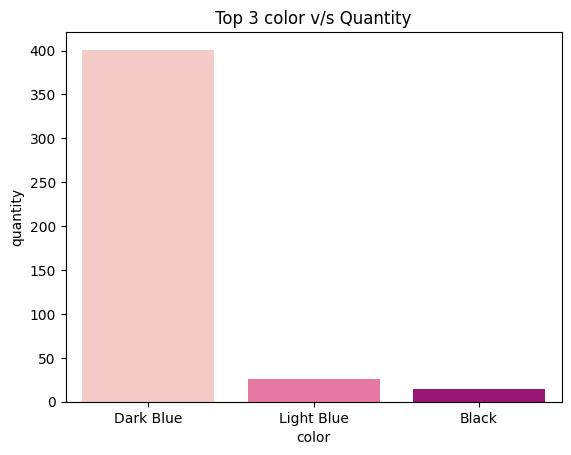

In [ ]:
sns.barplot(x='color',y='quantity',data=df1,palette='RdPu')
plt.title('Top 3 color v/s Quantity')
plt.xlabel('color')
plt.ylabel('quantity')
plt.show()

<ipython-input-64-9e14a3f7149a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='size',y='quantity',data=df2,palette='RdPu')


<Axes: xlabel='size', ylabel='quantity'>

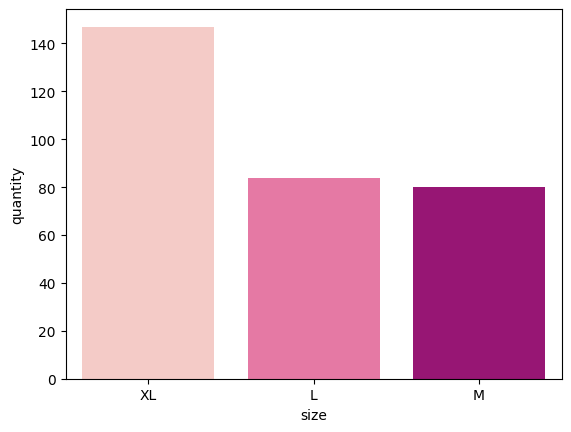

In [ ]:
#Size v/S Quantity

df2=df.groupby(['color','size'])['quantity'].sum().reset_index().sort_values(by='quantity',ascending=False)[:3]
df2

sns.barplot(x='size',y='quantity',data=df2,palette='RdPu')
plt

Text(0.5, 1.0, 'Revenue v/s Month')

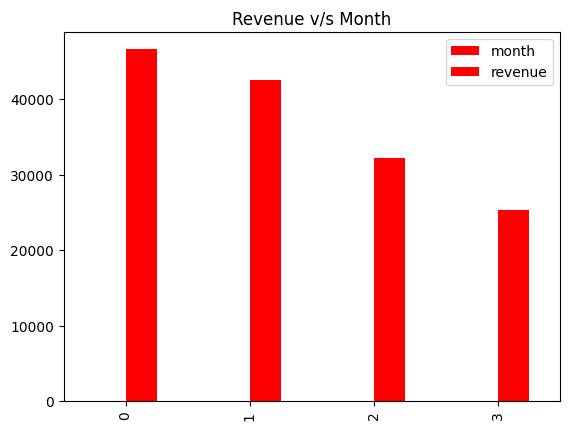

In [ ]:
#Revenue v/s Month

df3=df.groupby('month')['revenue'].sum().sort_values(ascending=False).reset_index()

df3.plot(kind='bar',color='red')
plt.title('Revenue v/s Month')


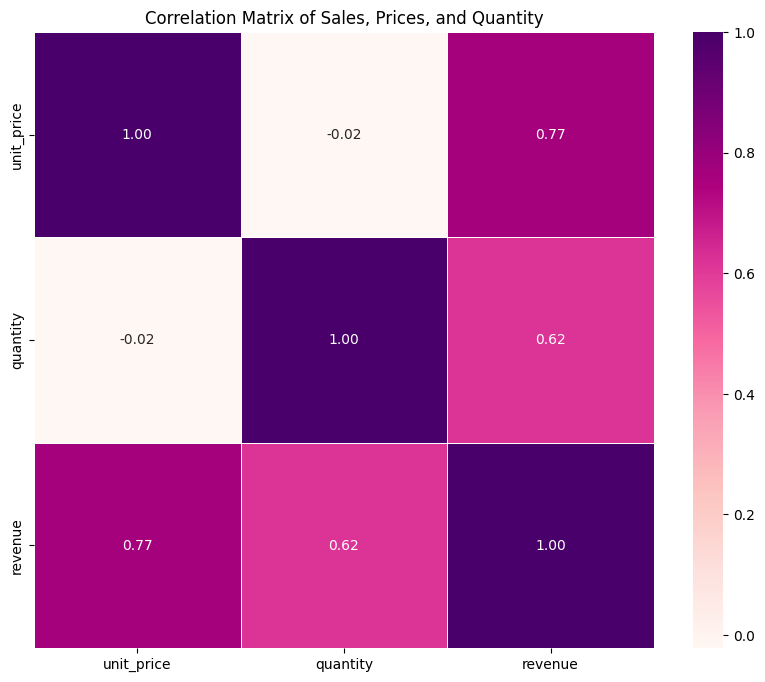

In [ ]:
#Relation Between Sales, Prices, and Quantity


correlation_matrix_numeric = df.drop(['order_id'], axis=1).select_dtypes(include=['float64', 'int64']).corr()



plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='RdPu', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Sales, Prices, and Quantity")
plt.show()

<Axes: xlabel='remove_unit_price', ylabel='quantity'>

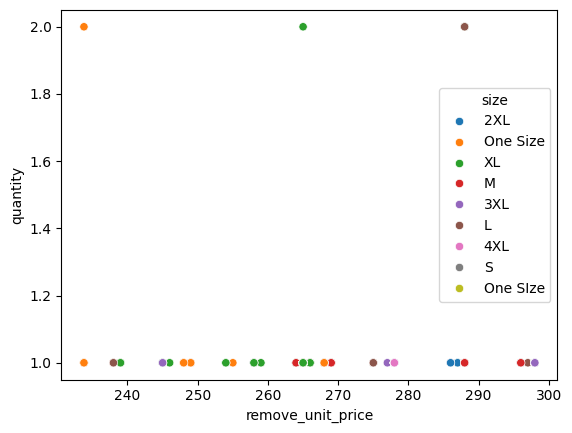

In [ ]:
sns.scatterplot(x='remove_unit_price',y='quantity',hue='size',data=df)



,month,color,revenue
62,9,Dark Blue,36843
43,8,Dark Blue,31256
28,7,Dark Blue,26117


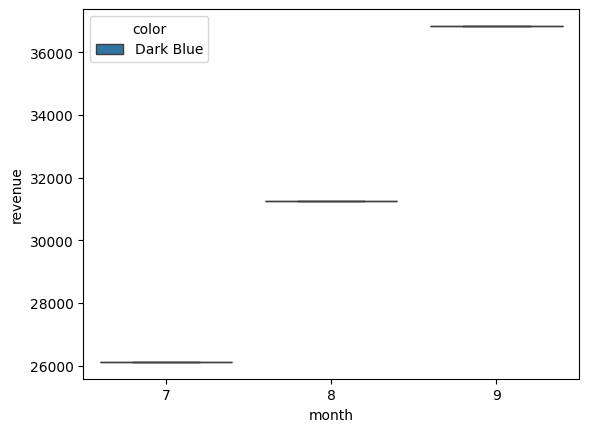

In [ ]:
sns.boxplot(x='month',y='revenue',hue='color',data=top_3_data,)
top_3_data = df.groupby(['month','color'])['revenue'].sum().reset_index().sort_values(by='revenue',ascending=False)[:3]
top_3_data

The Women's Clothing Ecommerce Exploratory Data Analysis (EDA) reveals valuable insights into various aspects of the business.


1.Through the analysis, it was identified that among the available sizes, a XL size stands out as the highest-selling, providing valuable information for inventory management and marketing strategies.

2.The examination of color trends in clothing indicates dark blue color are most popular among customers. This information can guide the product design and stocking decisions to meet customer preferences effectively.

3.The relationship between sales, prices, and quantity was explored, shedding light on the dynamics of these variables. Understanding how changes in one factor impact the others is crucial for pricing strategies and optimizing inventory levels.

4.The analysis delved into the earnings per month, providing a comprehensive view of the business's financial performance over time. This insight is essential for assessing the seasonality of sales, identifying peak months, and making informed decisions about resource allocation and marketing efforts.

In conclusion, the Women's Clothing Ecommerce EDA not only provides a snapshot of current business performance but also offers actionable insights for strategic decision-making, ensuring that the company can adapt and thrive in a competitive market.